In [14]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

#Dataset load
df = pd.read_csv("german_data_creditcard.csv")
df.head()

,Creditability,Acc_Bal_bin,Pay_Status_bin,Value_SavStock_bin,Length_Emp_bin,S&M_Status_bin,No_of_Credits_bin,Co_Credits_bin,Purpose_bin,Telephone_bin,Instalment_bin,Apartment_bin,Most_Val_Asset_bin,Duration_Credit,Credit_Amount,Age_bin
0,1,a. no account,c. no problem,"a. none, < 100 DM","a. Unemp, < 1 yr","a. M div, M single",a. 1,b. None,"a. used car, others",a. No,a. < 20,a. owner-occ / free,b. Savings / Car / Other,18,1049,a < 25 yr
1,1,a. no account,c. no problem,"a. none, < 100 DM",b. [1-4) years,"b. M mar, M wid, F",b. > 1,b. None,"a. used car, others",a. No,c. [25-35),a. owner-occ / free,c. No assets,9,2799,b. >= 25 yr
2,1,b. no balance,b. paid up,"a. none, < 100 DM",c. above 4 years,"a. M div, M single",a. 1,b. None,"a. used car, others",a. No,c. [25-35),a. owner-occ / free,c. No assets,12,841,a < 25 yr
3,1,a. no account,c. no problem,"a. none, < 100 DM",b. [1-4) years,"b. M mar, M wid, F",b. > 1,b. None,"a. used car, others",a. No,b. [20-25),a. owner-occ / free,c. No assets,12,2122,b. >= 25 yr
4,1,a. no account,c. no problem,"a. none, < 100 DM",b. [1-4) years,"b. M mar, M wid, F",b. > 1,a. Other Banks or Dept Stores,"a. used car, others",a. No,a. < 20,b. rented flat,b. Savings / Car / Other,12,2171,b. >= 25 yr


Shape: (1000, 16)


,count,proportion
Creditability,,
1,700,0.7
0,300,0.3


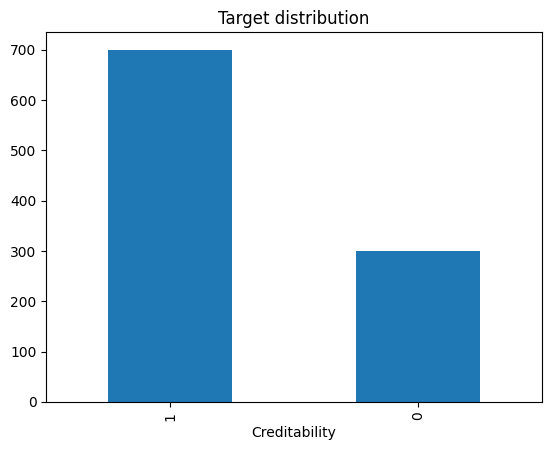

In [15]:
target_col = "Creditability"

print("Shape:", df.shape)

counts = df[target_col].value_counts()
proportions = df[target_col].value_counts(normalize=True)

display(pd.DataFrame({"count": counts, "proportion": proportions}))

counts.plot(kind="bar", title="Target distribution")
plt.show()

In [16]:

y = df["Creditability"]
X = df.drop("Creditability", axis=1)

# Categorical columns
cat_cols = X.columns.tolist()

# Preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)



In [17]:
from sklearn.model_selection import train_test_split, cross_val_score

# AdaBoost model
ada = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

ada_param_grid = { 
    "ada__n_estimators": [50, 100, 200, 300], 
    "ada__learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0] }

pipeline_ada = Pipeline(steps=[
    ("preprocess", preprocess),
    ("ada", ada)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Grid Search 
grid_ada = GridSearchCV( 
    estimator=pipeline_ada, 
    param_grid=ada_param_grid, 
    cv=5, scoring="accuracy", 
    n_jobs=-1 ) 
    
grid_ada.fit(X_train, y_train)

print("Best AdaBoost Hyperparameters:", grid_ada.best_params_)

# Cross-validation 
cv_scores_ada = cross_val_score(pipeline_ada, X, y, cv=5, scoring="accuracy") 
print("AdaBoost Cross‑Val Accuracy:", cv_scores_ada) 
print("AdaBoost Mean CV Accuracy:", cv_scores_ada.mean())


# Fit model
pipeline_ada.fit(X_train, y_train)

# Predictions
y_pred_ada = pipeline_ada.predict(X_test)

# Evaluation
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nAdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada))


Best AdaBoost Hyperparameters: {'ada__learning_rate': 0.5, 'ada__n_estimators': 100}
AdaBoost Cross‑Val Accuracy: [0.705 0.715 0.7   0.75  0.62 ]
AdaBoost Mean CV Accuracy: 0.6980000000000001
AdaBoost Accuracy: 0.745

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.33      0.44        60
           1       0.76      0.92      0.83       140

    accuracy                           0.74       200
   macro avg       0.70      0.63      0.64       200
weighted avg       0.73      0.74      0.72       200



GradientBoosting Classifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Hyperparameter
gb_param_grid = {
    "gb__n_estimators": [100, 200, 300],
    "gb__learning_rate": [0.01, 0.05, 0.1],
    "gb__max_depth": [2, 3, 4],
    "gb__subsample": [0.6, 0.8, 1.0]
}

pipeline_gb = Pipeline(steps=[
    ("preprocess", preprocess),
    ("gb", gb)
])

# Grid Search CV
grid_gb = GridSearchCV(
    estimator=pipeline_gb,
    param_grid=gb_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_gb.fit(X_train, y_train)

# Results
print("Best Gradient Boosting Hyperparameters:", grid_gb.best_params_)
print("Best GB CV Accuracy:", grid_gb.best_score_)

# Test performance
y_pred_gb = grid_gb.predict(X_test)
print("\nGradient Boosting Test Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Best Gradient Boosting Hyperparameters: {'gb__learning_rate': 0.05, 'gb__max_depth': 4, 'gb__n_estimators': 100, 'gb__subsample': 0.8}
Best GB CV Accuracy: 0.75625

Gradient Boosting Test Accuracy: 0.75

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        60
           1       0.78      0.89      0.83       140

    accuracy                           0.75       200
   macro avg       0.70      0.65      0.67       200
weighted avg       0.73      0.75      0.73       200



Comparison

- Comparing the GB CV accuracy(0.75) and Adaboost CV accuracy(0.69) shows that GB outperforms Adaboost in stablization across folds
- The Recall value of GB - 0.42 is better than Adaboost - 0.33 which is predominantly important for identifying calss 0 - bad credit score customer in which GB stands out.
- Also The F1 score is higher for GB - 0.50 than Adaboost - 0.44 for Class 0 from which GB balances precision and Recall
- Based on the Recall value of Adaboost Class1(0.92) and class0(0.33) it has a high bias on finding every good customer but missing the risky customers because it uses weak learners and sensitive to imbalance data
- Where as GradientBoost learns the pattern gradually and less sensitive to imbalance data

Overall GradientBoosting is the stronger model for this dataset. It provides better cross‑validated performance, improved class 0 recall, and more balanced classification overall.
However, both models still show limitations due to class imbalance data.
